In [1]:
import sys
!{sys.executable} -m pip install iexfinance
!{sys.executable} -m pip install mpl_finance
!{sys.executable} -m pip install mplfinance
!{sys.executable} -m pip install wget
from datetime import datetime
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from pandas.plotting import register_matplotlib_converters
import csv
import matplotlib.dates as dates
import matplotlib.pyplot as pyplot
import mpl_finance as mpfold
import mplfinance
import os
import pandas
import wget
register_matplotlib_converters()

In [2]:
# get iextoken
import json
import os
print(os.getcwd())
def GetIexToken():
    strRoot='D:\\denbrige\\180 FxOption\\103 FxOptionVerBack\\083 FX-Git-Pull\\14docktrader\\config\\'
    strToken=''
    try:
        with open(strRoot + 'iex.conf') as fJsn:
            jsnIEX = json.load(fJsn)
        strToken=jsnIEX['iextoken']
        print("Found IEX Token from config")
    except:
        strToken=input("Enter IEX Token: ")
    return strToken
strToken=GetIexToken()

D:\Program\WinPython64-3760\notebooks
Found IEX Token from config


In [3]:
# list of tickers to be processed
def GetStockTicker(blnSp500=False):
    strTicker = []
    if blnSp500 == True:
        strStockFile = "stockrow/sp500_constituents.csv"
        if os.path.exists(strStockFile) == True:
            file=open(strStockFile, "r")
            reader = csv.reader(file)
            #skip header
            next(reader) 
            for line in reader:
                strTicker.append(line[0])
        else:
            print("Error: " + strStockFile + " undefined")
    else:
        strInput = input("Enter ticker(s) delimited by comma: ")
        for ticker in strInput.split(','):
            strTicker.append(ticker)
    return strTicker

def IexStockTicker(ticker):
    # assert ticker is not empty
    if len(strTicker) == 0:
        return
    
    for i in ticker:
        objStock = Stock(i, output_format='pandas', token=strToken)
        dfCompany = objStock.get_company()
        print('\nTicker: ' + i)
        print('CEO: ' + dfCompany.loc['CEO'][0])
        print('Company: ' + dfCompany.loc['companyName'][0])
        print('Desc: ' + dfCompany.loc['description'][0])
        print('No. of Employees: ' + str(dfCompany.loc['employees'][0]))
        print('Exchange: ' + dfCompany.loc['exchange'][0])
        print('Industry: ' + dfCompany.loc['industry'][0])
        print('Sector: ' + dfCompany.loc['sector'][0])
        print('Tags: ' + ','.join(dfCompany.loc['tags'][0]))
        print('')
        dfEst = objStock.get_estimates()
        print('Fiscal Period: ' + dfEst.loc['fiscalPeriod'][0])
        print('Report Date: ' + dfEst.loc['reportDate'][0])
        print('Consensus EPS: ' + str(dfEst.loc['consensusEPS'][0]))
        print('No. of Ests: ' + str(dfEst.loc['numberOfEstimates'][0]))
        print('Fiscal EndDate: ' + dfEst.loc['fiscalEndDate'][0])

def StockRowPull(ticker, save_location):
    # assert ticker is not empty
    if len(strTicker) == 0:
        return
    
    today = datetime.today()
    # files are saved to subfolder "yyyymm", since fundamental data doesn't change regularly, 
    # we download files to monthly folders, e.g. 202001 for January 2020
    path = save_location + '%02d' % today.year + '%02d' % today.month + '/'
    
    print('Beginning Download to ' + path)
    for i in ticker:
        #create the folder in which all of the dowloads will be saved
        if not os.path.exists(path):
            os.makedirs(path)
        print('Processing ' + i)
        #skip if ticker exists
        if os.path.exists(path + i + '_Annual_Incomestatement.xlsx') == False:
            #location of income statement
            Income_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Income%20Statement&sort=desc'
            #download the income statement to previously specified location
            try:
                wget.download(Income_url, path + i + '_Annual_Incomestatement.xlsx', bar=None)
            except:
                print('Warning: Not Found ' + i + '_Annual_Incomestatement.xlsx')
                
        if os.path.exists(path + i + '_Annual_BalanceSheet.xlsx') == False:
            #location of balance sheet
            Balance_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Balance%20Sheet&sort=desc'
            #download the balance sheet
            try:
                wget.download(Balance_url, path + i + '_Annual_BalanceSheet.xlsx', bar=None)
            except:
                print('Warning: Not Found ' + i + '_Annual_BalanceSheet.xlsx')
                
        if os.path.exists(path + i + '_Annual_StatementofCashFlows.xlsx') == False:
            #location of cash flows
            Cash_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Cash%20Flow&sort=desc'
            #download cash flows
            try:
                wget.download(Cash_url, path + i + '_Annual_StatementofCashFlows.xlsx', bar=None)
            except:
                print('Warning: Not Found ' + i + '_Annual_StatementofCashFlows.xlsx')
                
        if os.path.exists(path + i + '_Annual_Metrics.xlsx') == False:
            Metrics_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Metrics&sort=desc'
            #download cash flows
            try:
                wget.download(Metrics_url, path + i + '_Annual_Metrics.xlsx', bar=None)
            except:
                print('Warning: Not Found ' + i + '_Annual_Metrics.xlsx')
                
    print('Files Downloaded')

def StockRowExcel(ticker, strExcelFile, objRow):
    dfSheet=pandas.read_excel(strExcelFile,sheet_name=ticker)
    if type(objRow) == int:
        print(dfSheet.iloc[objRow,:])
    else:
        print(dfSheet.loc[dfSheet.iloc[:,0] == objRow].transpose())

def PieceStockTicker(ticker, save_location):
    # assert ticker is not empty
    if len(strTicker) == 0:
        return
    
    today = datetime.today()
    # files are saved to subfolder "yyyymm", since fundamental data doesn't change regularly, 
    # we download files to monthly folders, e.g. 202001 for January 2020
    path = save_location + '%02d' % today.year + '%02d' % today.month + '/'
    
    print('Reading excel files from ' + path)
    for i in ticker:
        #create the folder in which all of the dowloads will be saved
        if not os.path.exists(path):
            os.makedirs(path)
        print('Processing ' + i)
        #skip if ticker exists
        if os.path.exists(path + i + '_Annual_Incomestatement.xlsx') == True:
            #location of income statement
            Income_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Income%20Statement&sort=desc'
            #read the income statement from specified location
            StockRowExcel(i, path + i + '_Annual_Incomestatement.xlsx', 'Revenue')
            StockRowExcel(i, path + i + '_Annual_Incomestatement.xlsx', 'EPS (Diluted)')
                
        if os.path.exists(path + i + '_Annual_BalanceSheet.xlsx') == True:
            #location of balance sheet
            Balance_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Balance%20Sheet&sort=desc'
                
        if os.path.exists(path + i + '_Annual_StatementofCashFlows.xlsx') == True:
            #location of cash flows
            Cash_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Cash%20Flow&sort=desc'
            #read the cash flows from specified location
            StockRowExcel(i, path + i + '_Annual_StatementofCashFlows.xlsx', 'Operating Cash Flow')
                
        if os.path.exists(path + i + '_Annual_Metrics.xlsx') == True:
            Metrics_url = 'https://stockrow.com/api/companies/' + i + '/financials.xlsx?dimension=A&section=Metrics&sort=desc'
            #read the metrics from specified location
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'Free Cash Flow per Share')
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'ROE')
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'Debt/Equity')
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'Market Cap')
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'P/E ratio')
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'P/B ratio')
            StockRowExcel(i, path + i + '_Annual_Metrics.xlsx', 'Dividend Yield')
                
    print('Excel Files Processed')
  
def MpfPlotWave(ticker):
    # assert ticker is not empty
    if len(ticker) == 0:
        return
    
    start=datetime(2019, 2, 9)
    end=datetime(2020,2,11)
    
    # values that can be parameterized
    intEmaPeriod = 34
    intBars = 90

    row=0
    for i in ticker:
        ohlc = get_historical_data(i, start, end, output_format='pandas', token=strToken)
        ohlc.columns=["Open", "High", "Low", "Close", "Volume"]
        if (intBars+intEmaPeriod > len(ohlc)):
            print("Error: Bars + EmaPeriod exceeds ohlc " + str(len(ohlc)-intBars-intEmaPeriod))
            return

        hEma = ohlc['High'].ewm(intEmaPeriod).mean()
        cEma = ohlc['Close'].ewm(intEmaPeriod).mean()
        lEma = ohlc['Low'].ewm(intEmaPeriod).mean()
    
        # extract OHLC into a list of lists
        lohlc = ohlc[['Open', 'High', 'Low', 'Close']].values.tolist()
    
        # convert dates in datetime format to mathplotlib dates
        mdates = dates.date2num(ohlc.index)
    
        # prepare ohlc in mathplotlib format
        mohlc = [ [mdates[i]] + lohlc[i] for i in range(len(mdates)) ]
    
        # set default font sizes
        params = {'axes.labelsize': 20,'axes.titlesize': 24}
        pyplot.rcParams.update(params)
        
        fig, ax = pyplot.subplots(figsize = (24,24))
        
        # set default tick sizes
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=18)
    
        # mpfold.plot_day_summary_ohlc(ax, mohlc[-50:], ticksize=5, colorup='#77d879', colordown='#db3f3f') # alternatively, use a barchart
        mpfold.candlestick_ohlc(ax, mohlc[-intBars:], width=0.4, colorup='#77d879', colordown='#db3f3f')
        ax.plot(hEma[-intBars:], color='red', linewidth=2, label='high, '+str(intEmaPeriod)+'-Day EMA')
        ax.plot(cEma[-intBars:], color='green', linewidth=2, label='close, '+str(intEmaPeriod)+'-Day EMA')
        ax.plot(lEma[-intBars:], color='blue', linewidth=2, label='low, '+str(intEmaPeriod)+'-Day EMA')

        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_title(i +' Chart with '+str(intEmaPeriod)+'-Day EMA Wave')
        ax.legend(fontsize=20)
        ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
        fig.autofmt_xdate()        
        
        # plt.show() # add this if you're not using Jupyter Notebook

In [4]:
strTicker = GetStockTicker()
print('No. of tickers:', len(strTicker))
IexStockTicker(strTicker)
StockRowPull(strTicker, save_location = './')
PieceStockTicker(strTicker, save_location = './')

Enter ticker(s) delimited by comma: FB,AAPL
No. of tickers: 2

Ticker: FB
CEO: Mark Elliot Zuckerberg
Company: Facebook, Inc.
Desc: Facebook, Inc. operates as a social networking company worldwide. The company engages in the development of social media applications for people to connect through mobile devices, personal computers, and other surfaces. It enables users to share opinions, ideas, photos, videos, and other activities online. The firm's products include Facebook, Instagram, Messenger, WhatsApp, and Oculus. The company was founded by Mark Elliot Zuckerberg, Dustin Moskovitz, Chris R. Hughes, Andrew McCollum, and Eduardo P. Saverin on February 4, 2004 and is headquartered in Menlo Park, CA.
No. of Employees: 44942
Exchange: NASDAQ
Industry: Internet Software/Services
Sector: Technology Services
Tags: Technology Services,Internet Software/Services,Miscellaneous Commercial Services,Commercial Services

Fiscal Period: Q1 2020
Report Date: 2020-04-22
Consensus EPS: 1.93
No. of Ests

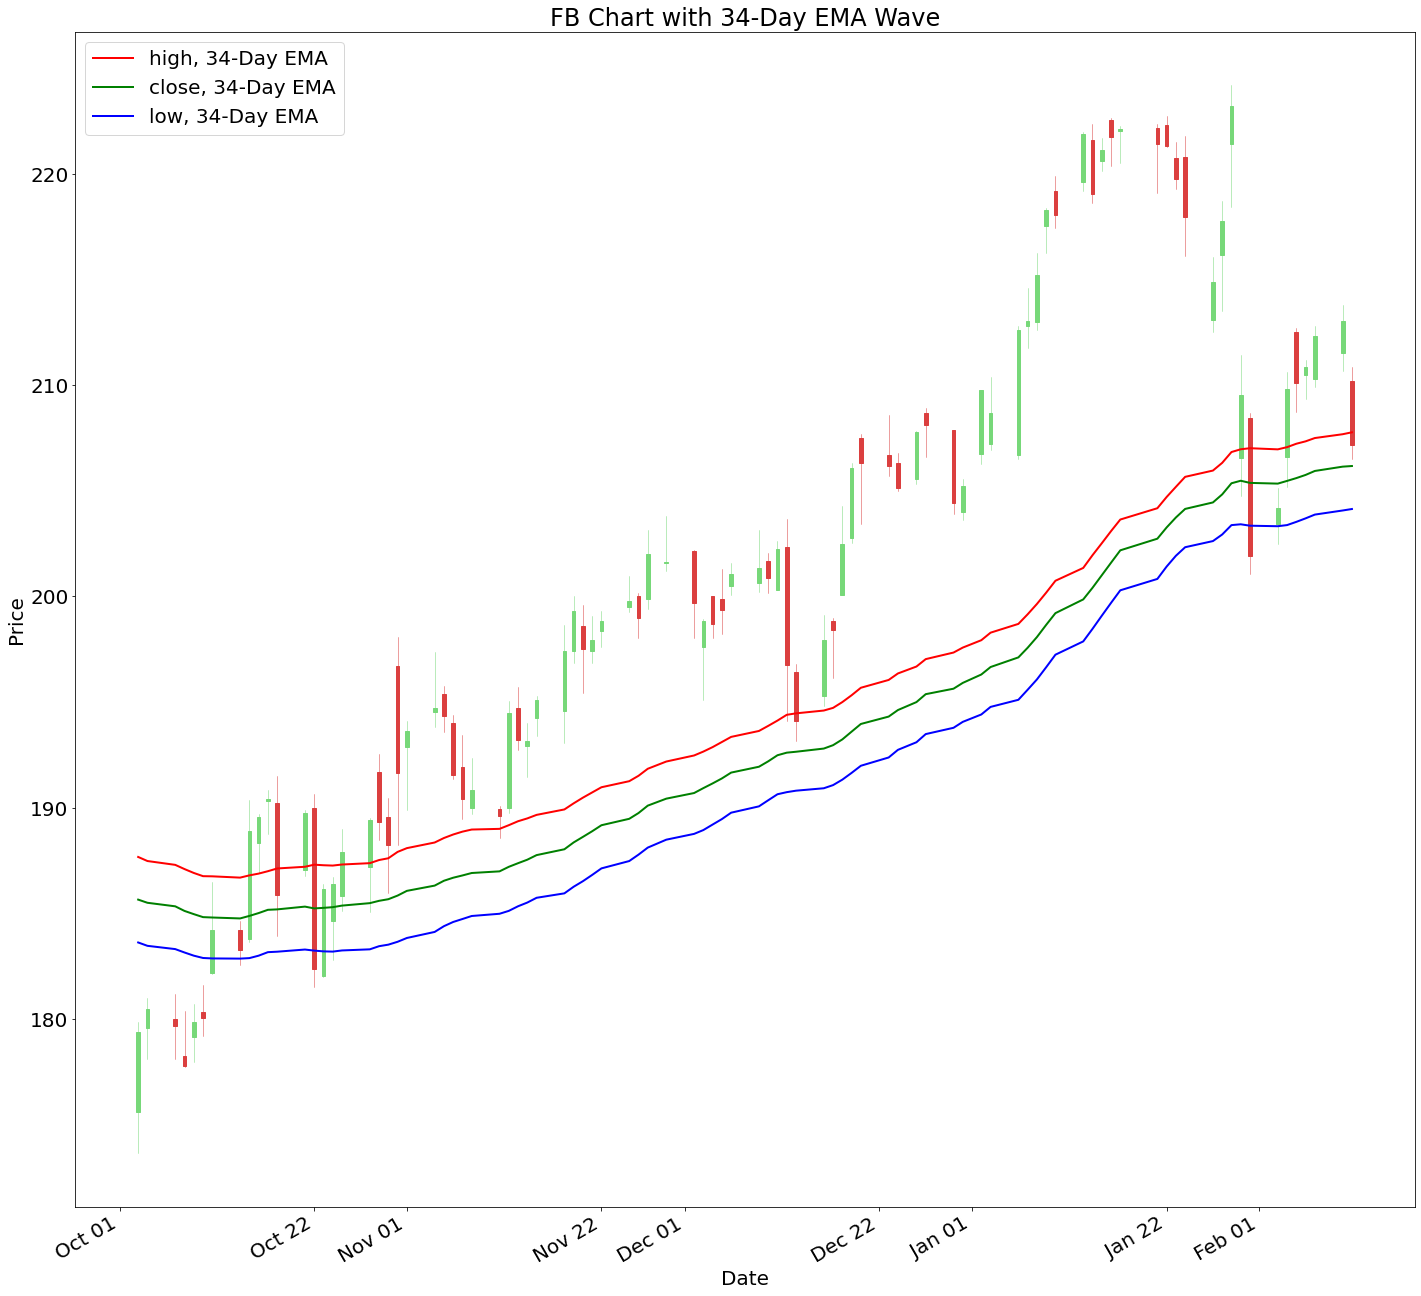

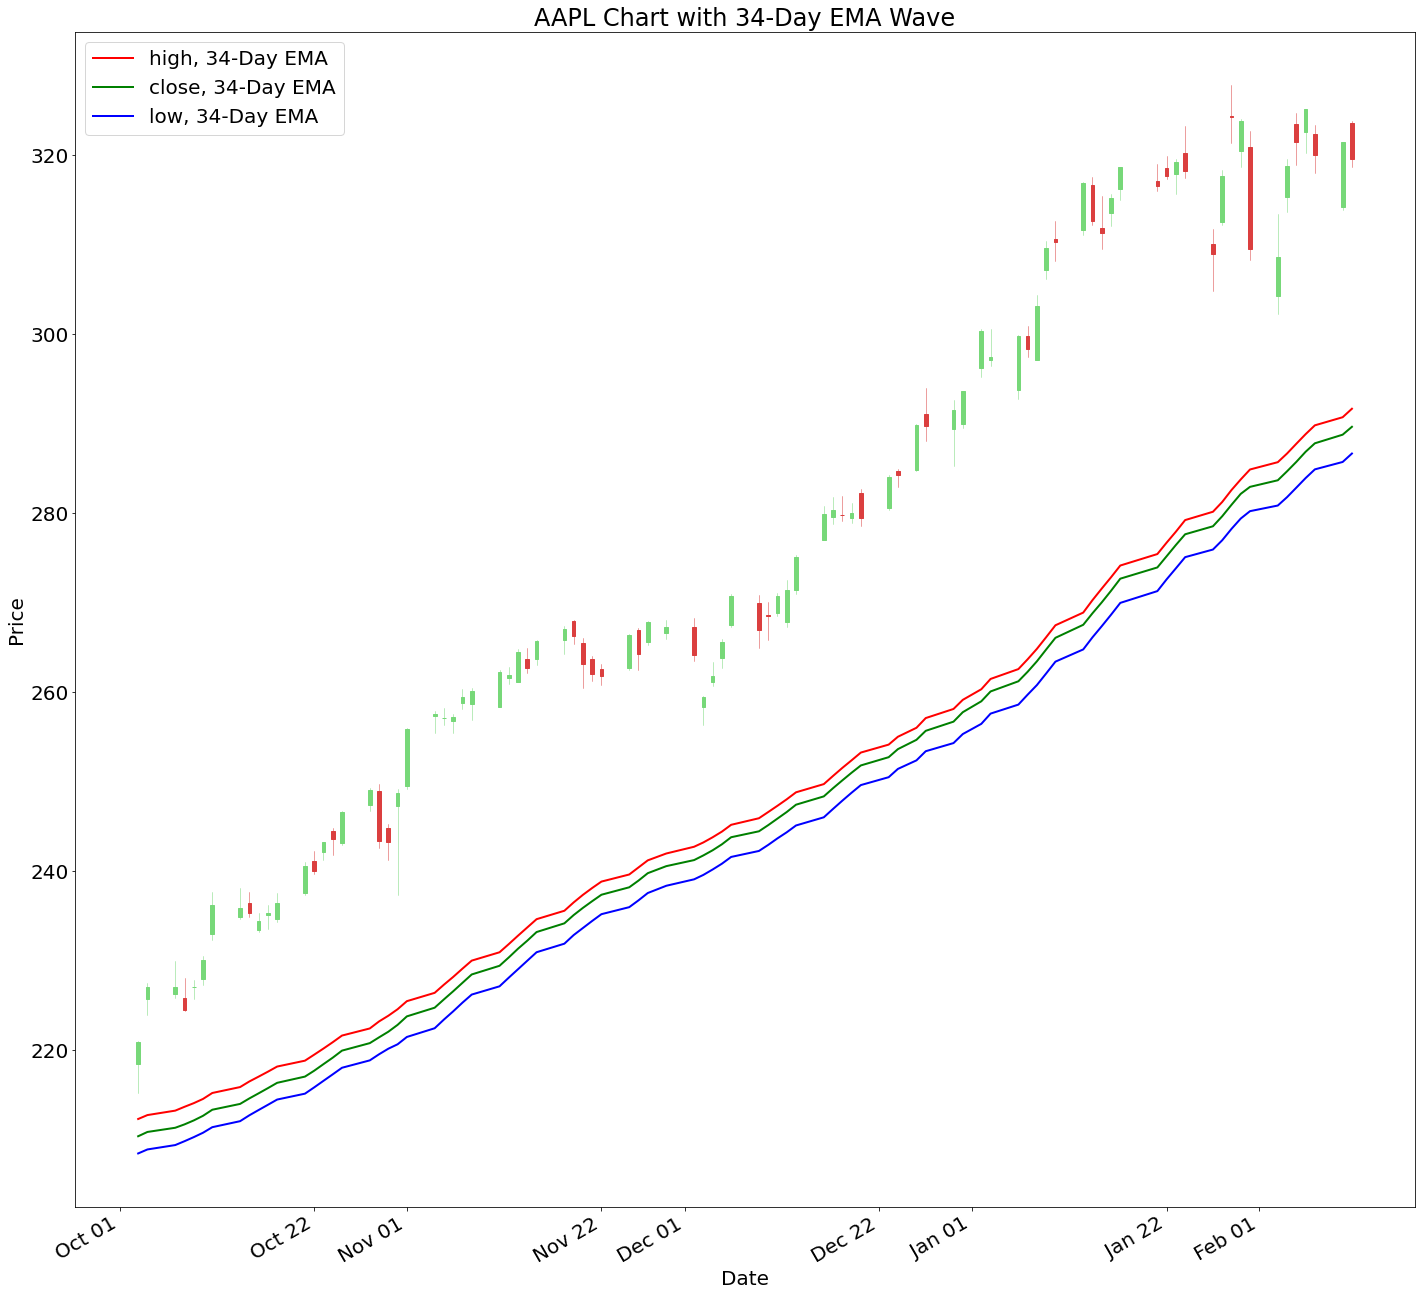

In [5]:
MpfPlotWave(strTicker)